# Importing needed libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Reading and Exploring Data

#### Read data and Get the shape


In [52]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df=pd.read_csv("dataset.csv")
df.shape

C:\Users\mazen\AppData\Local\Temp\ipykernel_31528\2322084008.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataset.csv")


(958524, 45)

### Read first 20 Row

In [3]:
df.head(20)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,Hebe,NaN,N,N,5.80,185.180,0.2679,2.900,JPL 89,2459000.5,59000,20200531.0,J2000,0.203219,2.424533,1.931822,14.739653,138.643432,239.736273,190.686496,2.917243,0.261073,2.459649e+06,2.022031e+07,1378.924506,3.775290,0.973673,378.924321,1.978600e-08,2.748200e-09,4.811900e-08,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,Iris,NaN,N,N,5.60,199.830,0.2766,10.000,110,2459000.5,59000,20200531.0,J2000,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,2.459422e+06,2.021073e+07,1347.347071,3.688835,0.850693,331.064195,1.991900e-08,2.007500e-09,4.748800e-08,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,Flora,NaN,N,N,6.50,147.491,0.2260,1.025,JPL 118,2459000.5,59000,20200531.0,J2000,0.155833,2.201415,1.858362,5.889081,110.876524,285.458915,315.318013,2.544467,0.301753,2.459149e+06,2.020103e+07,1193.029574,3.266337,0.875980,340.905137,2.364400e-08,2.308400e-09,5.176000e-08,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,Metis,NaN,N,N,6.30,190.000,0.1180,NaN,JPL 116,2459000.5,59000,20200531.0,J2000,0.123300,2.386189,2.091972,5.576494,68.909459,6.337325,23.912204,2.680407,0.267391,2.458911e+06,2.020030e+07,1346.343282,3.686087,1.107110,430.853999,1.841400e-08,3.089300e-09,4.425800e-08,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,

### Deiscribe the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [5]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


# Data Cleaning and Visualization

### Drop unwanted columns

In [53]:
df.drop([
    'id', 'spkid', 'full_name', 'pdes', 'name', 'prefix',
    'orbit_id', 'epoch_cal', 'tp_cal',
    'epoch_mjd', 'tp',
    'per_y',
    'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
    'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad',
    'sigma_n', 'sigma_tp', 'sigma_per'
],axis=1,inplace=True)

### check Duplicates

In [54]:
print(f" at the first the Number of duplicates is {df.duplicated().sum()}")
df.drop_duplicates()
print(f" at the first the Number of duplicates is {df.duplicated().sum()}")


 at the first the Number of duplicates is 0
 at the first the Number of duplicates is 0


### Null values and Handle them

Number of Null values for each column isalbedo            823421
diameter_sigma    822443
diameter          822315
pha                19921
moid               19921
H                   6263
moid_ld              127
neo                    4
per                    4
ad                     4
rms                    2
ma                     1
q                      0
om                     0
w                      0
a                      0
n                      0
e                      0
equinox                0
epoch                  0
class                  0
i                      0
dtype: int64
//////////////////////////////////////////////////
The percent of Null values to all rows for each column is albedo            0.859051
diameter_sigma    0.858031
diameter          0.857897
pha               0.020783
moid              0.020783
H                 0.006534
moid_ld           0.000132
neo               0.000004
per               0.000004
ad                0.000004
rms               

<Axes: >

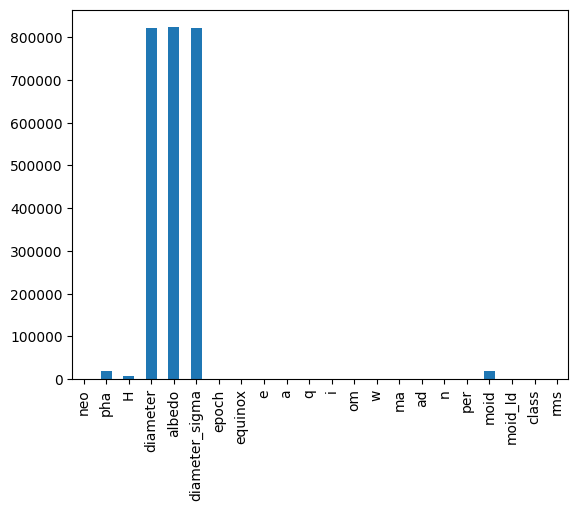

In [8]:
print(f"Number of Null values for each column is{df.isna().sum().sort_values(ascending=False)}")
print('/'*50)
print(f"The percent of Null values to all rows for each column is {(df.isna().sum()/len(df)).sort_values(ascending=False)}")
print('/'*50)
df.isna().sum().plot(kind="bar")


In [55]:
df = df.dropna(subset=['diameter'])
df = df.dropna(subset=['albedo'])
df.reset_index(drop=True, inplace=True)

In [56]:
#Drop column that have high percent of null values
df.drop(['diameter_sigma'],axis=1,inplace=True)

In [57]:
#Identify column that has null values to fill na
obj_missing_column=['pha','neo']
num_missing_column=['moid','H','moid_ld','per','ad','rms','ma']



In [58]:
#Fill object columns with most frequent value
obj_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
for col in obj_missing_column:
    df[[col]]=obj_imputer.fit_transform(df[[col]])

In [59]:
#Fill numerical columns with median value
num_imputer=SimpleImputer(missing_values=np.nan,strategy="median")
for col in num_missing_column:
    df[[col]]=num_imputer.fit_transform(df[[col]])    

In [14]:
df.isna().sum()

neo         0
pha         0
H           0
diameter    0
albedo      0
epoch       0
equinox     0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid        0
moid_ld     0
class       0
rms         0
dtype: int64

In [15]:
df.shape

(135100, 21)

In [60]:
obj_cols=df.select_dtypes(include="object")
num_cols=df.select_dtypes(include="number")

In [61]:
for col in obj_cols:
    print(f"The unique value of {col} is {df[col].unique()}")

The unique value of neo is ['N' 'Y']
The unique value of pha is ['N' 'Y']
The unique value of equinox is ['J2000']
The unique value of class is ['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO']


In [62]:
df.drop("equinox",axis=1,inplace=True)

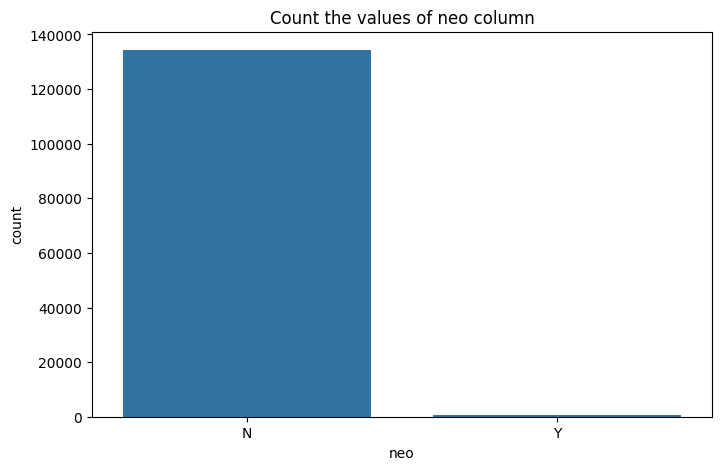

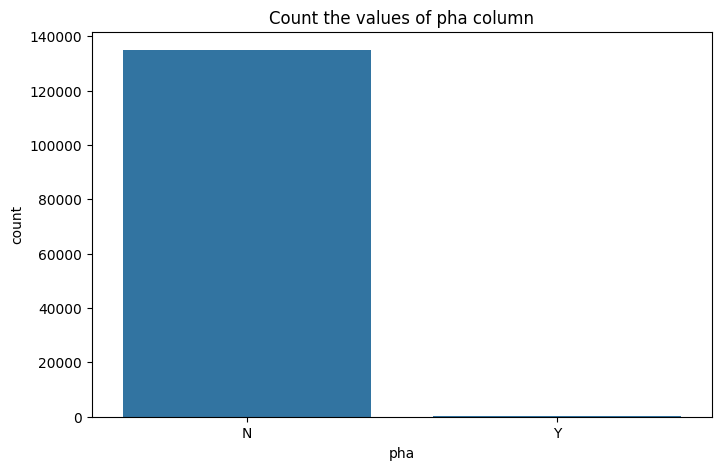

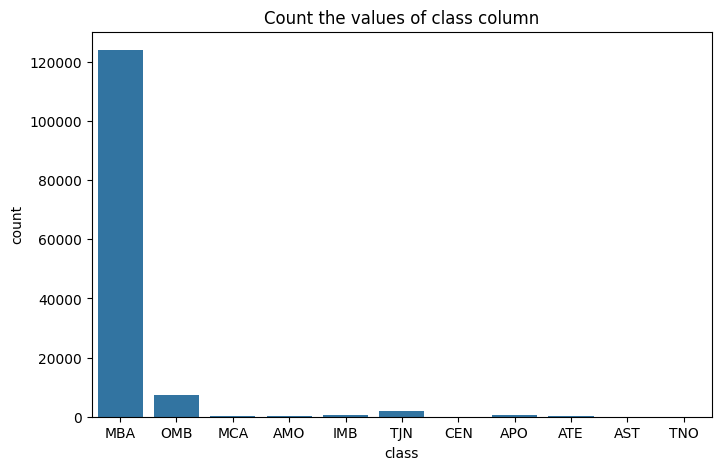

In [19]:
obj_cols=df.select_dtypes(include="object")
for col in obj_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col)
    plt.title(f"Count the values of {col} column")
    plt.show()

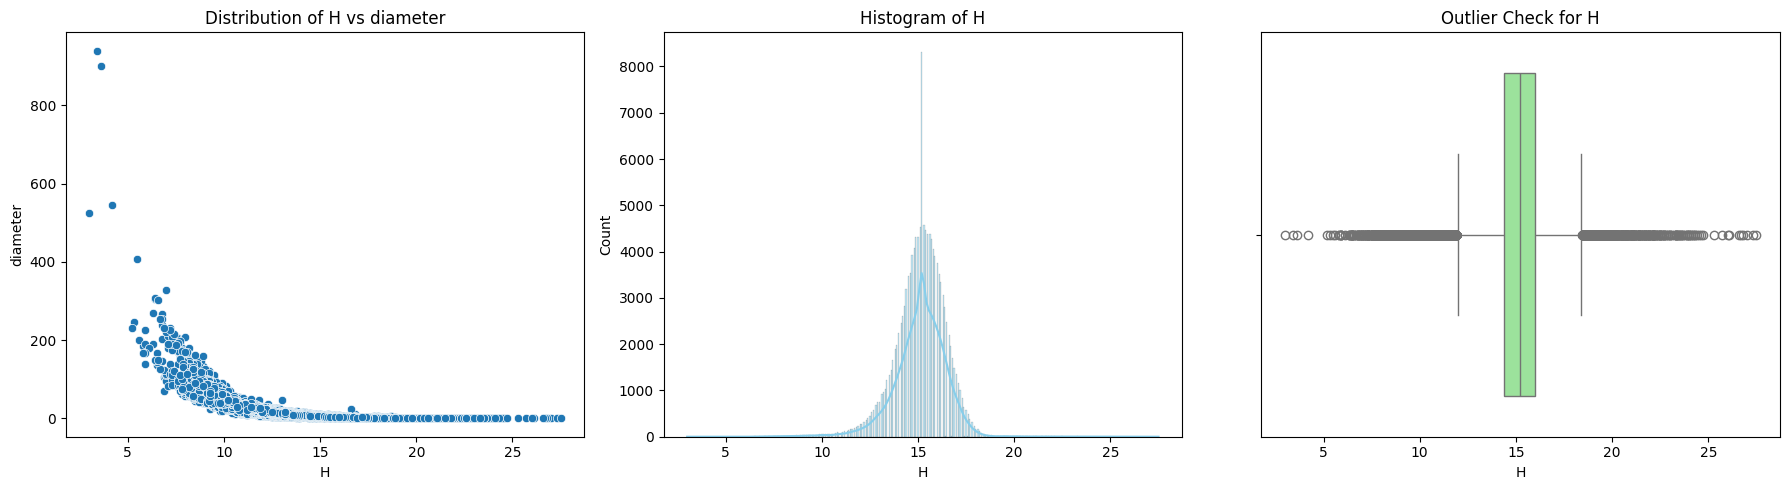

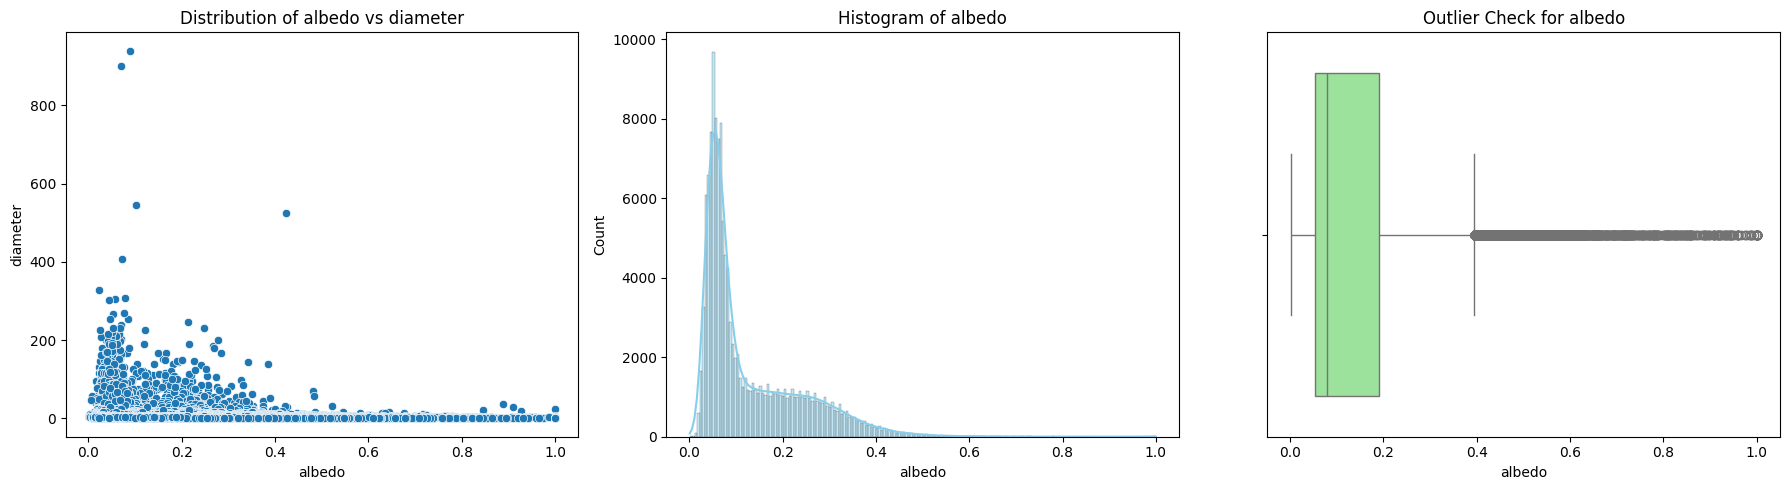

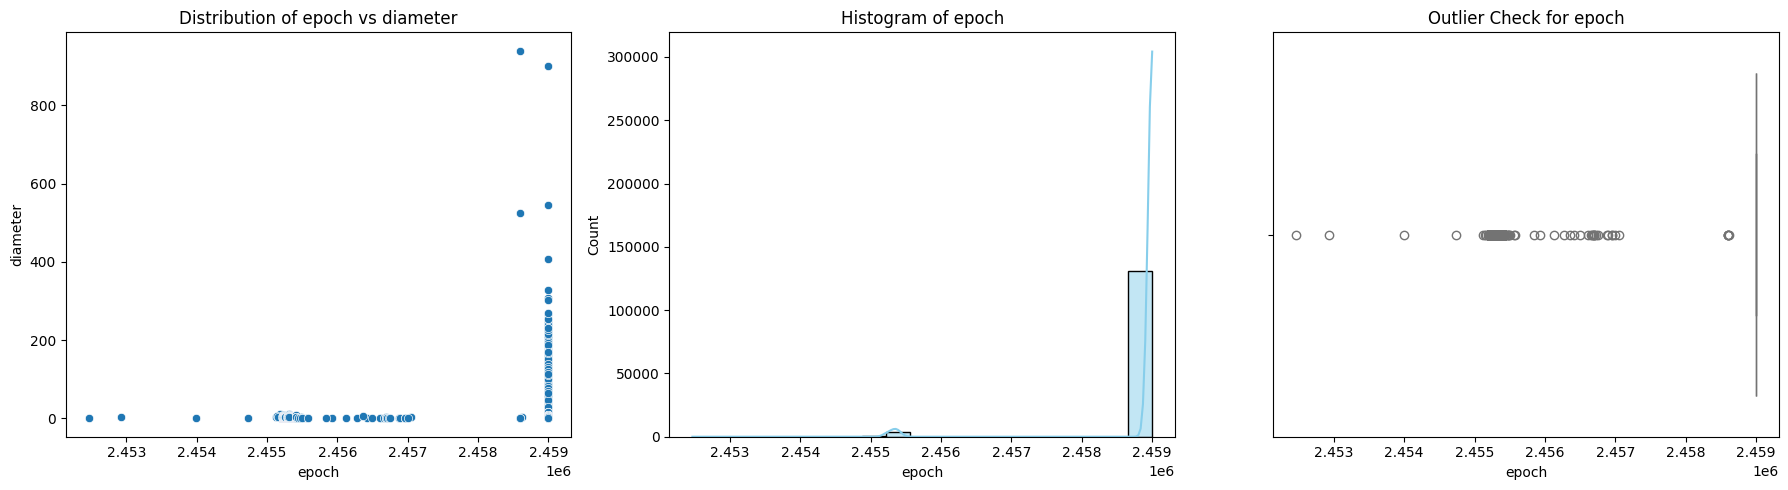

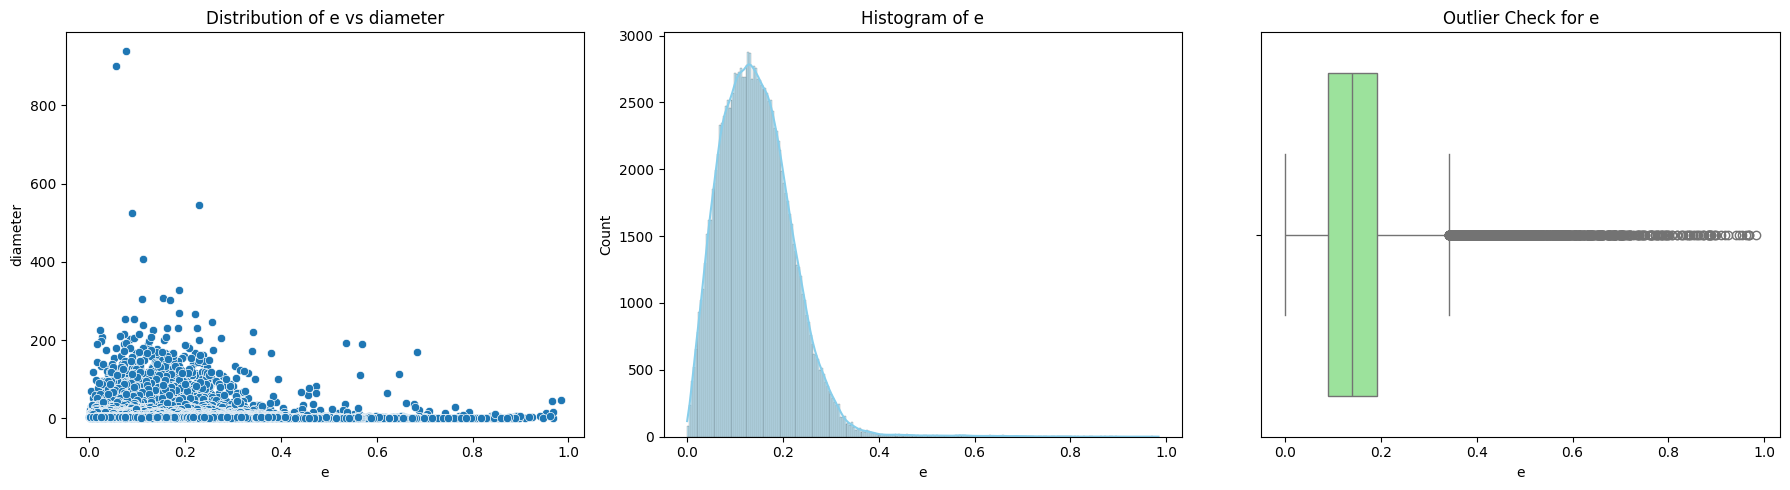

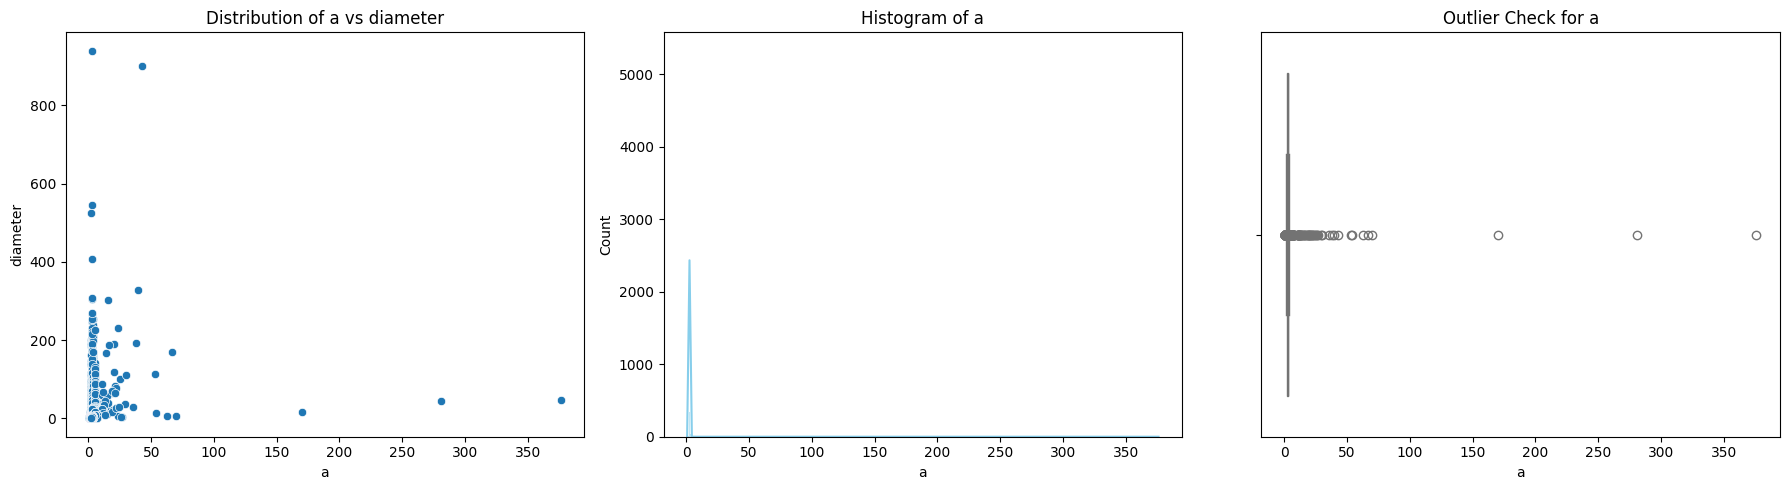

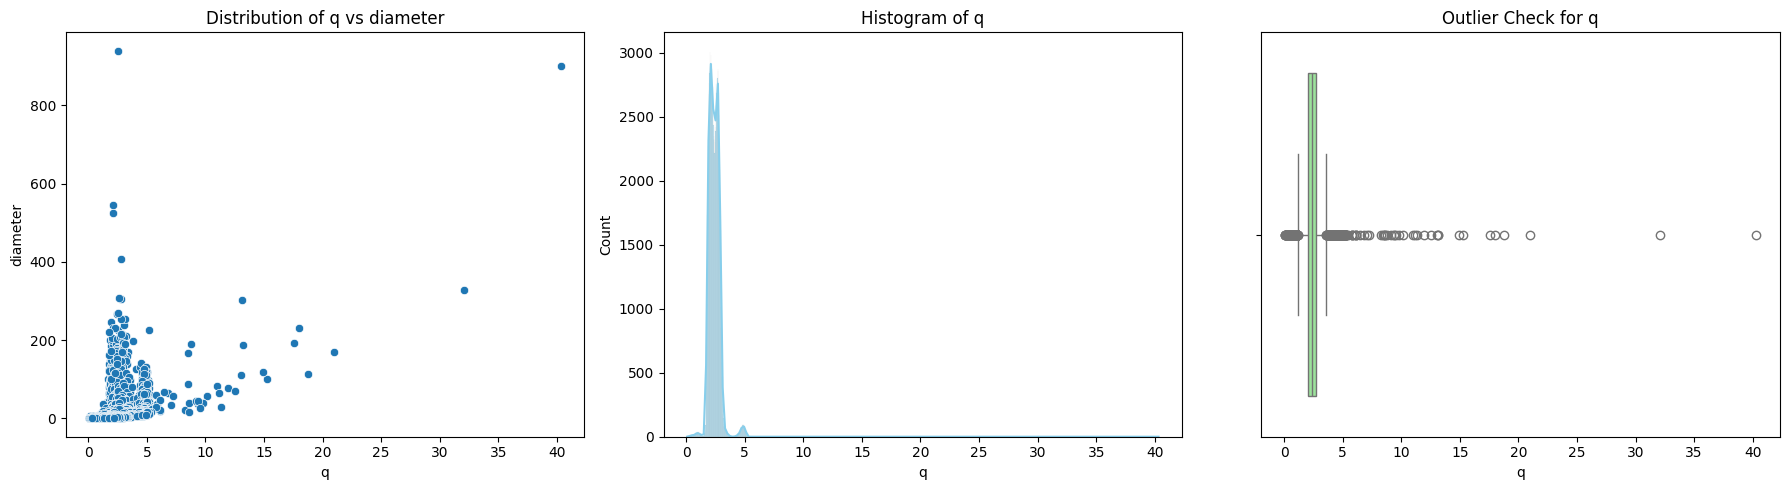

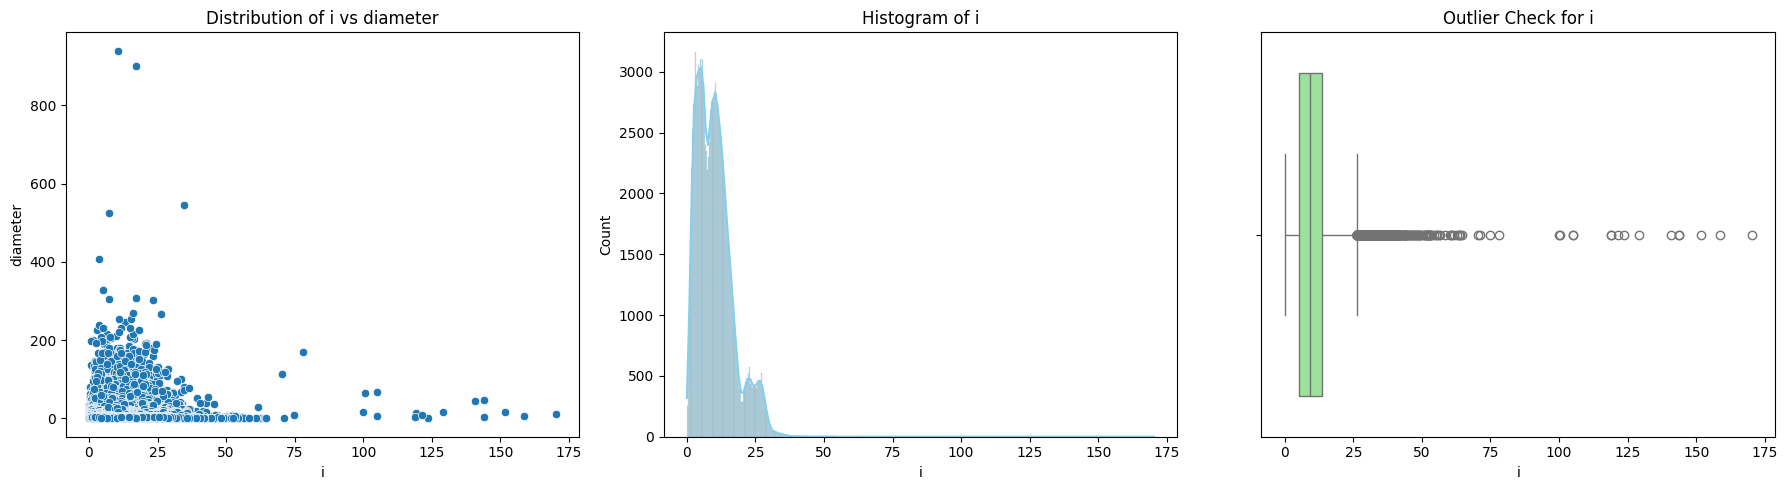

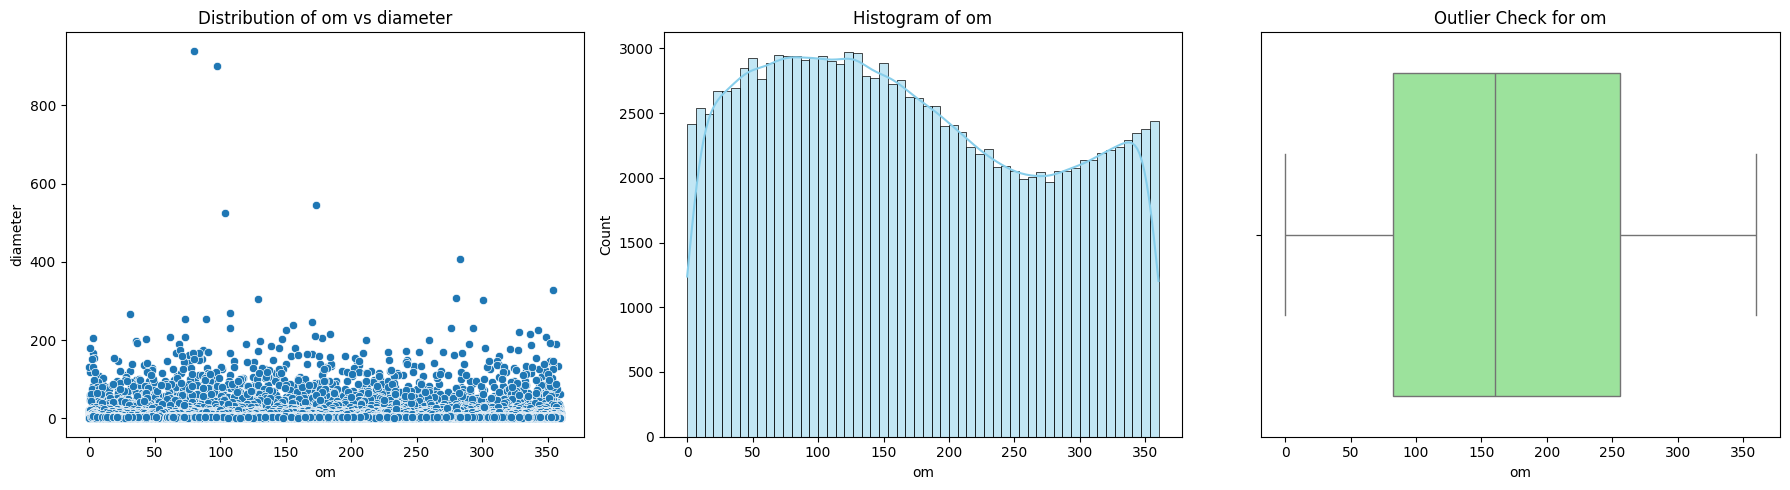

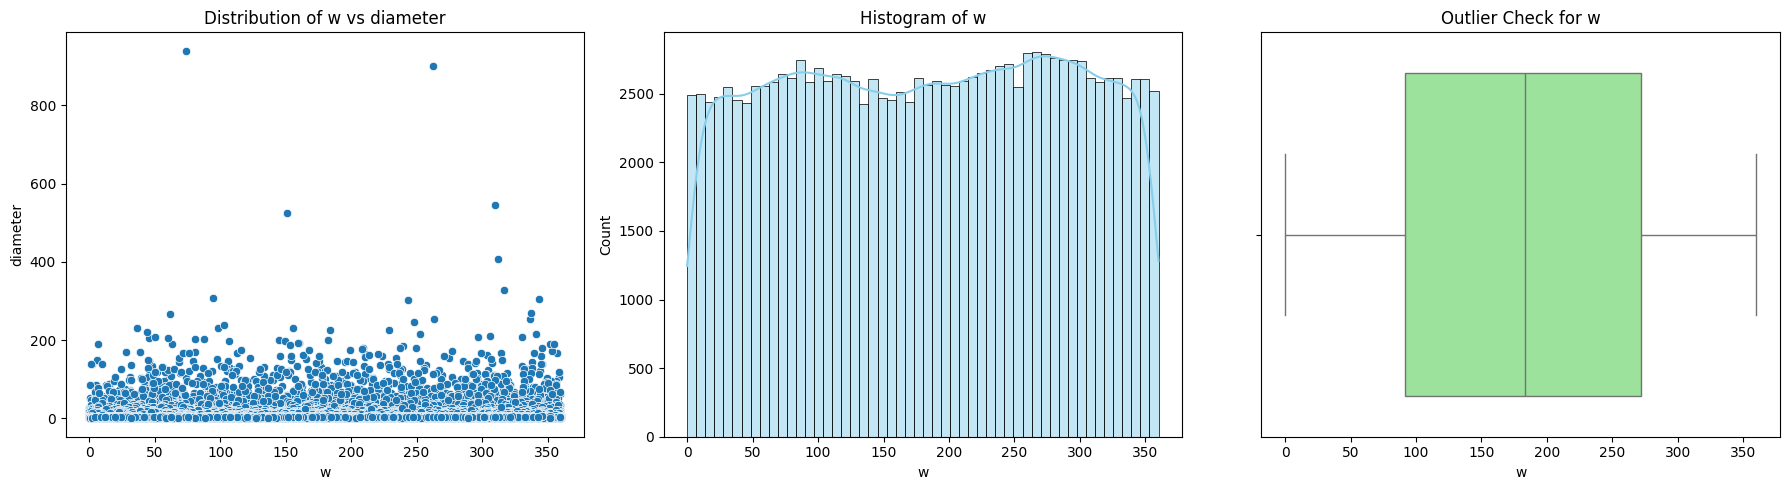

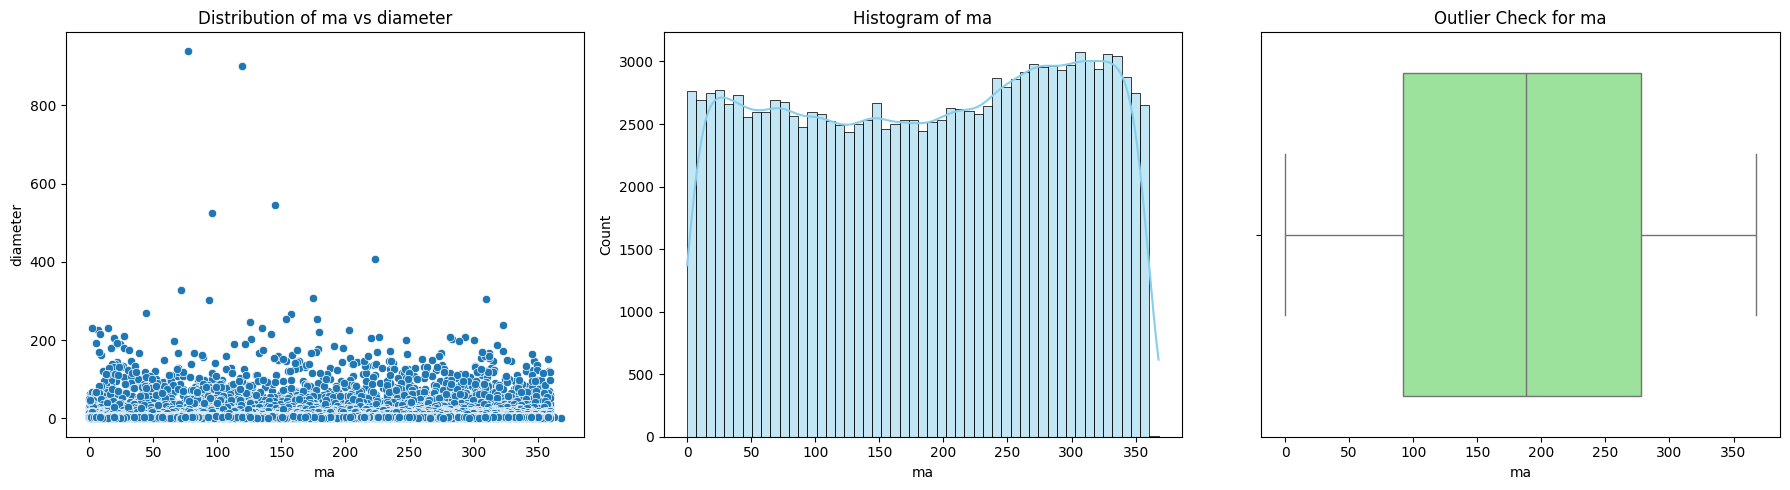

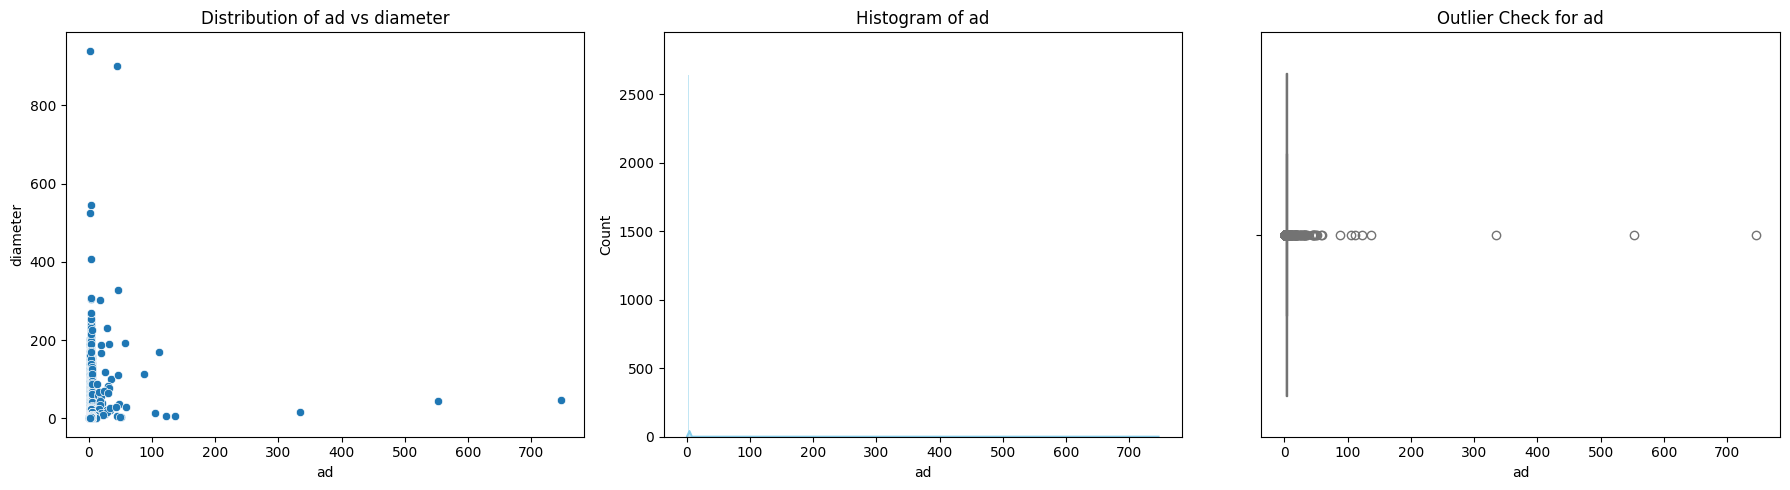

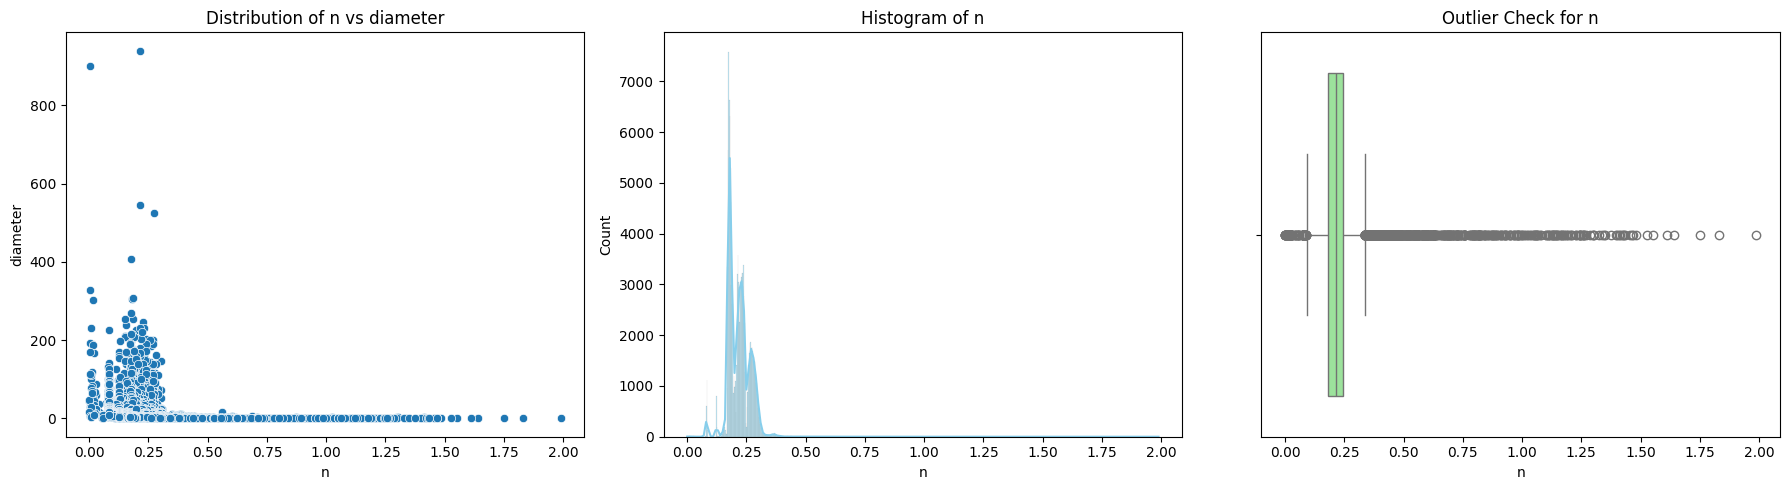

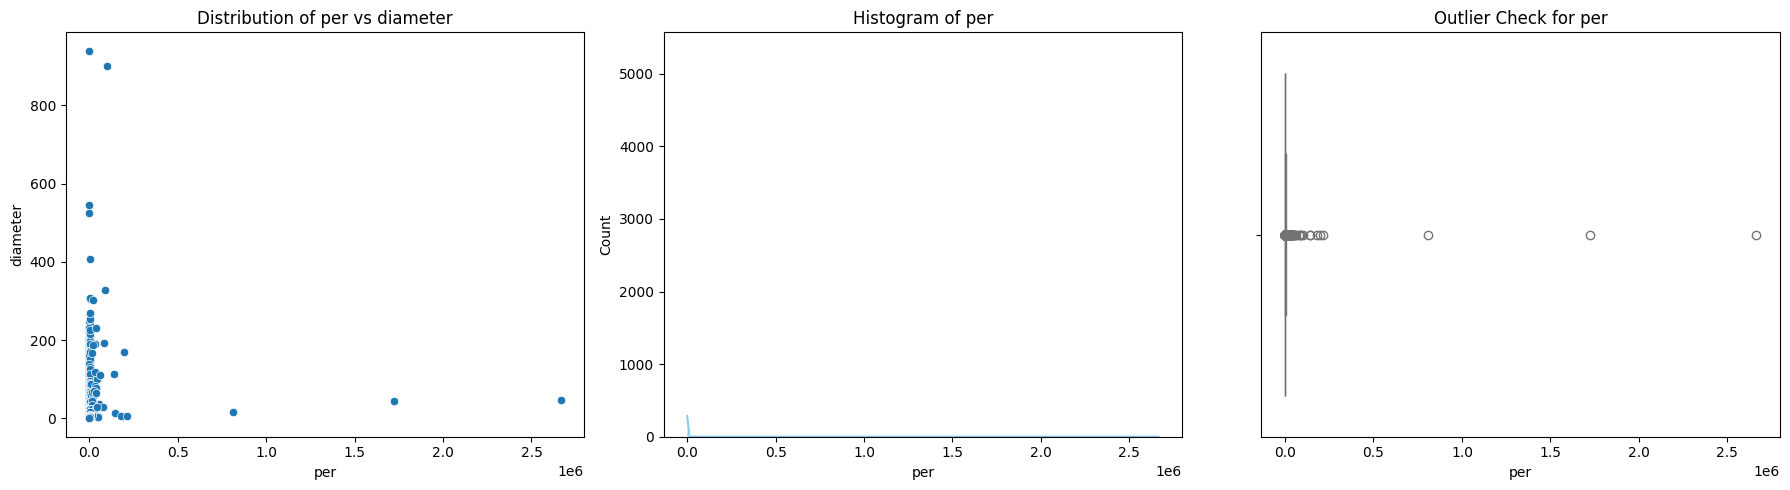

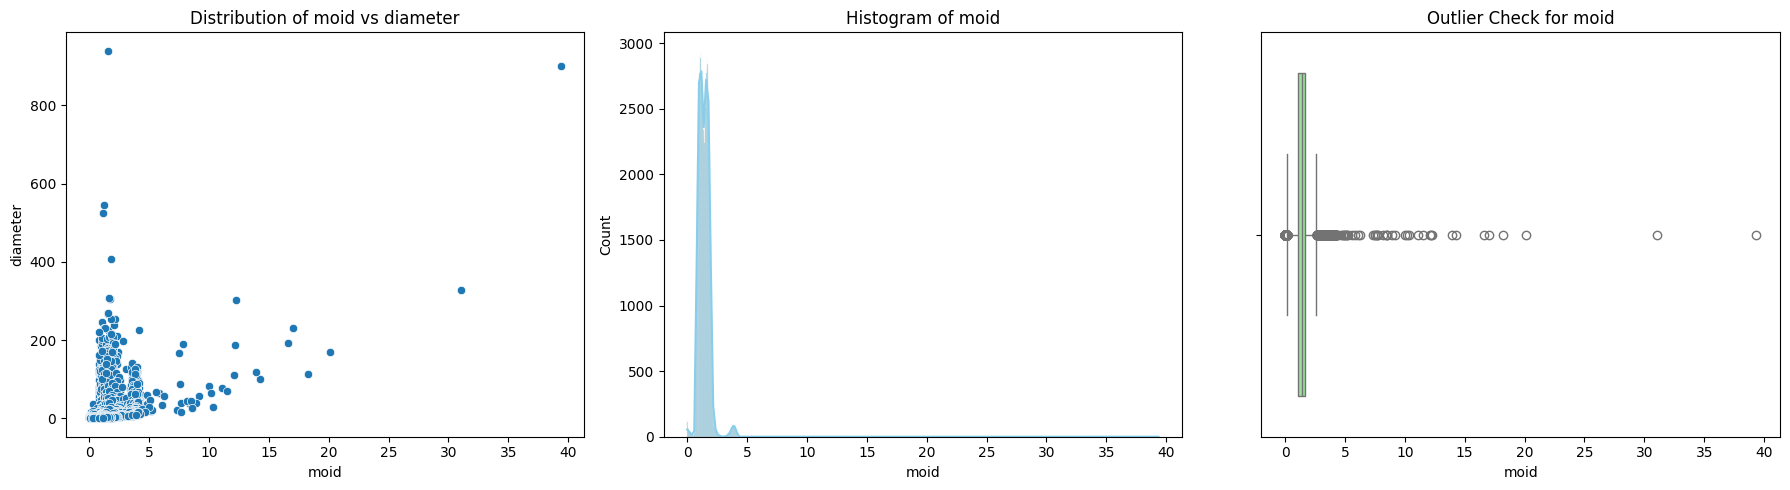

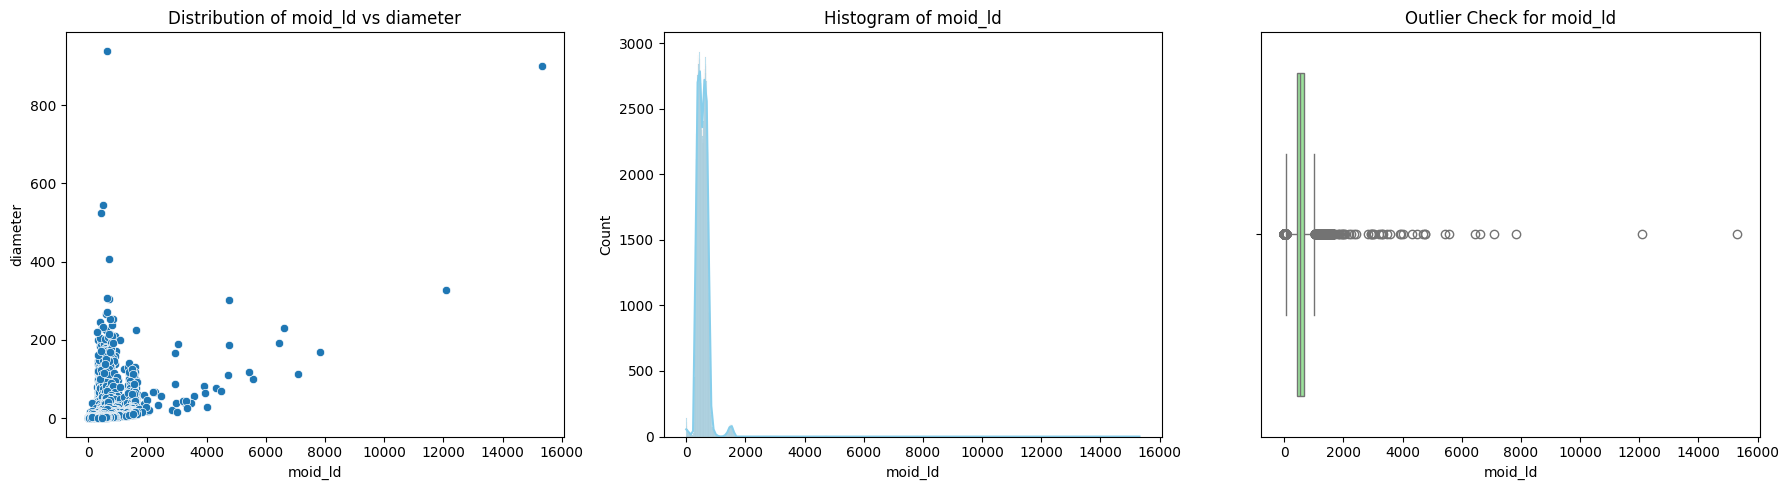

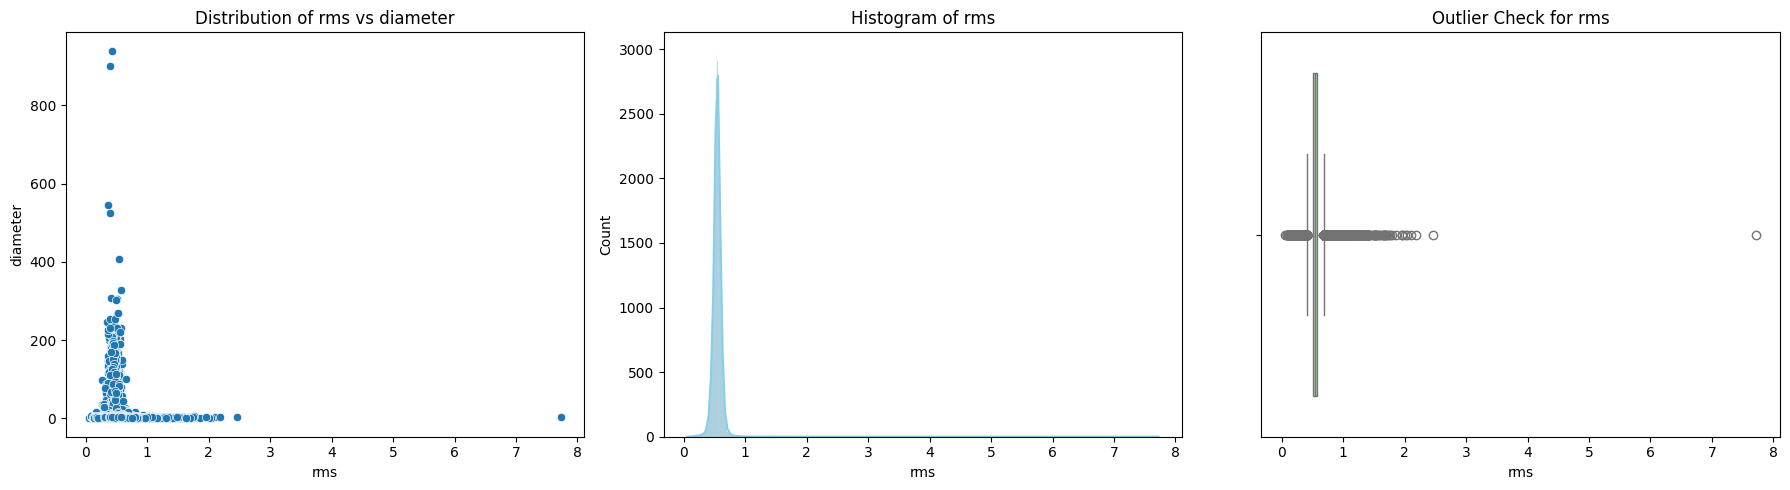

In [20]:
for col in num_cols:
    if col == 'diameter':
        continue  

    plt.figure(figsize=(18, 5))  

    # 1. Scatter Plot
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x=col, y='diameter')
    plt.title(f"Distribution of {col} vs diameter")

    # 2. Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")

    # 3. Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Outlier Check for {col}")

    plt.tight_layout()
    plt.show()


### Handling outlier

In [63]:
for col in num_cols:
    df[col].sort_values(ascending=True)
    q1 = np.percentile(df[col], 25, method="midpoint")
    q3 = np.percentile(df[col], 75, method="midpoint")
    print(f"Q1 for {col} is {q1}")
    print(f"Q3 for {col} is {q3}")
    iqr=q3-q1
    print(f"IQR for {col} is {iqr}")
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Outlier Lower Bound: {lower_bound}")
    print(f"Outlier Upper Bound: {upper_bound}")
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print('/'*50)

Q1 for H is 14.4
Q3 for H is 16.0
IQR for H is 1.5999999999999996
Outlier Lower Bound: 12.0
Outlier Upper Bound: 18.4
//////////////////////////////////////////////////
Q1 for diameter is 2.777
Q3 for diameter is 5.628
IQR for diameter is 2.851
Outlier Lower Bound: -1.4995000000000003
Outlier Upper Bound: 9.9045
//////////////////////////////////////////////////
Q1 for albedo is 0.054
Q3 for albedo is 0.198
IQR for albedo is 0.14400000000000002
Outlier Lower Bound: -0.16200000000000003
Outlier Upper Bound: 0.41400000000000003
//////////////////////////////////////////////////
Q1 for epoch is 2459000.5
Q3 for epoch is 2459000.5
IQR for epoch is 0.0
Outlier Lower Bound: 2459000.5
Outlier Upper Bound: 2459000.5
//////////////////////////////////////////////////
Q1 for e is 0.09184025081177098
Q3 for e is 0.1923878078709344
IQR for e is 0.10054755705916342
Outlier Lower Bound: -0.058981084776974155
Outlier Upper Bound: 0.34320914345967957
//////////////////////////////////////////////////


In [22]:
df.shape

(109196, 20)

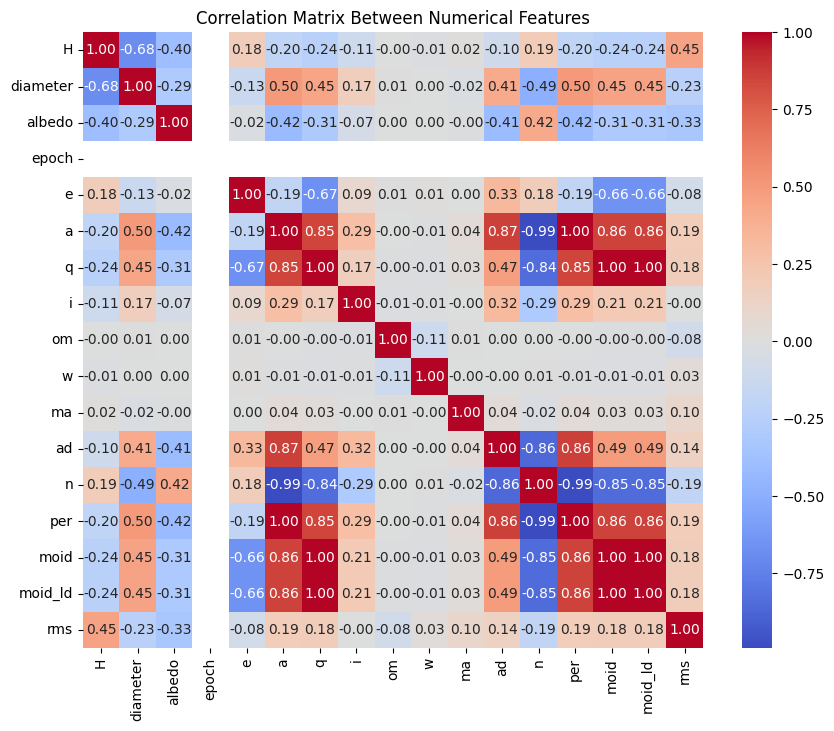

In [64]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Numerical Features')
plt.show()


In [65]:
#drop columns that have hifh correlation with other columns 
df.drop(columns=['moid_ld', 'n', 'per', 'moid'], inplace=True)

### Scaling numerical data

In [66]:
num_cols=df.select_dtypes(include="number").columns
sc=StandardScaler()
for col in num_cols:
    if col=="diameter":
        continue
    df[col]=sc.fit_transform(df[[col]])

# Encoding object data

### one hot encoder for Class column

In [67]:
class_dummies = pd.get_dummies(df['class'], prefix='class')
df = pd.concat([df, class_dummies], axis=1)
df.drop('class', axis=1, inplace=True)

### Label encoding for PHA and NEO as there values "Yes" or "No"

In [68]:
le = LabelEncoder()
df['pha'] = le.fit_transform(df['pha'])
df['neo'] = le.fit_transform(df['neo'])

In [69]:
expected_order = ['neo', 'pha', 'H', 'albedo', 'epoch', 'e', 'a', 'q', 'i',
                  'om', 'w', 'ma', 'ad', 'rms', 'class_MBA', 'class_MCA', 'class_OMB',"diameter"]
df = df[expected_order]


# Seperate Data and preprocess for Model

In [75]:
X=df.drop("diameter",axis=1,inplace=False)
y=df["diameter"]
expected_order = ['neo', 'pha', 'H', 'albedo', 'epoch', 'e', 'a', 'q', 'i',
                  'om', 'w', 'ma', 'ad', 'rms', 'class_MBA', 'class_MCA', 'class_OMB']
X = X[expected_order]

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=44,shuffle=True)
print(f"the shape of X train is {x_train.shape}")
print(f"the shape of X test is {x_test.shape}")
print(f"the shape of Y train is {y_train.shape}")
print(f"the shape of Y test is {y_test.shape}")

the shape of X train is (87356, 17)
the shape of X test is (21840, 17)
the shape of Y train is (87356,)
the shape of Y test is (21840,)


In [77]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10,min_samples_split=10),
    "Random Forest": RandomForestRegressor(n_estimators=150,max_depth=10,min_samples_split=10),
    "AdaBoost": AdaBoostRegressor(n_estimators=150,learning_rate=1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=150,learning_rate=1,max_depth=10),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(learning_rate=1,n_estimator=150,max_depth=10)
}

In [36]:
for name, model in regressors.items():
    print(f"\n Tuning: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(r2)


 Tuning: Linear Regression
0.8528841580234107

 Tuning: Decision Tree
0.9384611260791192

 Tuning: Random Forest
0.9466954357626498

 Tuning: AdaBoost
0.7646740718417617

 Tuning: Gradient Boosting
0.8971658671308436

 Tuning: K-Nearest Neighbors
0.8708178006602435

 Tuning: XGBoost


c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:40:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9074359975419858


In [78]:
model=RandomForestRegressor(n_estimators=150,max_depth=10,min_samples_split=10)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=150)

In [79]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)
    